# Investment Trading Strategies in Practice - ML Intro

## Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
raw = pd.read_csv('fin_dat.csv', index_col = 0, parse_dates = True)

FileNotFoundError: [Errno 2] No such file or directory: 'fin_dat.csv'

In [4]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.520000,157.590,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2010-01-01 to 2020-01-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2609 non-null   float64
 9   XAU=    2602 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 265.0 KB


In [6]:
symbol = 'AAPL.O'

In [7]:
data = pd.DataFrame(raw[symbol]).dropna()

In [8]:
data

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2019-12-24,284.270000
2019-12-26,289.910000
2019-12-27,289.800000


## Trading Strategy

In [9]:
sma_1 = 42
sma_2 = 252

In [10]:
data['sma_1'] = data[symbol].rolling(window = sma_1).mean()
data['sma_2'] = data[symbol].rolling(window = sma_2).mean()

In [11]:
data

,AAPL.O,sma_1,sma_2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2019-12-24,284.270000,264.845476,206.122639
2019-12-26,289.910000,265.877143,206.649385
2019-12-27,289.800000,266.847381,207.179742


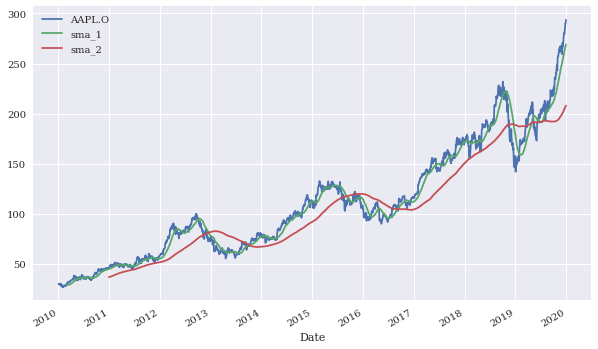

In [12]:
data.plot(figsize = (10, 6))
plt.show()

In [13]:
data.dropna(inplace = True)

The code below show the derivation of the positions, where the trading rules are: 

- Go LONG (= +1) when the 42 day (shorter) sma_1 is above the 252 (longer) sma_2.

- Go SHORT (= -1) when the the 42 day (shorter) sma_1 is below the 252 (longer) sma_2.

Notice that for a LONG ONLY strategy, we would use +1 for a long position and 0 for a flat (neutral) position.

In [14]:
data['position'] = np.where(data['sma_1'] > data['sma_2'], 1, -1)

In [15]:
data.tail(25)

,AAPL.O,sma_1,sma_2,position
Date,,,,
2019-11-25,266.37,245.366905,197.948671,1
2019-11-26,264.29,246.449524,198.304504,1
2019-11-27,267.84,247.494048,198.675933,1
2019-11-29,267.25,248.509762,199.018433,1
2019-12-02,264.16,249.585952,199.354187,1
2019-12-03,259.45,250.505714,199.675099,1
2019-12-04,261.74,251.332619,199.980337,1
2019-12-05,265.58,252.249762,200.333075,1
2019-12-06,270.71,253.352381,200.713988,1


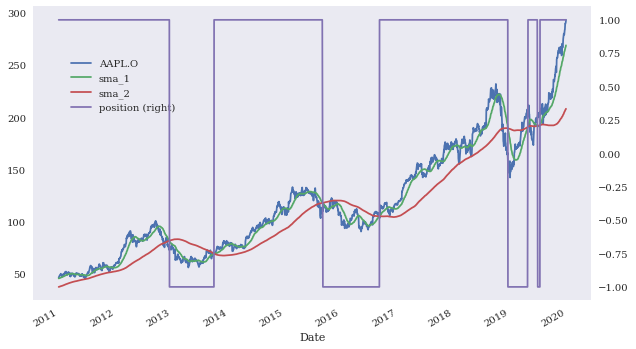

In [16]:
ax = data.plot(secondary_y = 'position', figsize = (10, 6))
ax.get_legend().set_bbox_to_anchor((0.27, 0.85))
plt.grid(False)
plt.savefig('../WORK/plot_01.png', dpi = 500)
plt.show()

This strategy leads to four periods only during which the Apple stock should be shorted. What is not shown here is if following the trading rules  -i.e. implementing the algorithmic trading strategy- is superior compared to a given benchmark case of simply going long on the Apple stock over the whole period.

## Backtesting

In [17]:
# Calculates the log returns of the Apple stock (benchmark investment)
data['returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [18]:
data

,AAPL.O,sma_1,sma_2,position,returns
Date,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809
...,...,...,...,...,...
2019-12-24,284.270000,264.845476,206.122639,1,0.000950
2019-12-26,289.910000,265.877143,206.649385,1,0.019646
2019-12-27,289.800000,266.847381,207.179742,1,-0.000380


In [19]:
"""
Multiplies the position values, shifted by one day, by the log returns
of the Apple stock; the shift is required to avoid a foresight bias.
The basic idea is that the algorithm can only set a position in the Apple
stock given today's market data (just before the close). The position then
earns tomorrow's return.
"""

data['strategy'] = data['position'].shift(1) * data['returns']

In [20]:
data.round(4)

,AAPL.O,sma_1,sma_2,position,returns,strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008
...,...,...,...,...,...,...
2019-12-24,284.2700,264.8455,206.1226,1,0.0010,0.0010
2019-12-26,289.9100,265.8771,206.6494,1,0.0196,0.0196
2019-12-27,289.8000,266.8474,207.1797,1,-0.0004,-0.0004


In [21]:
data.dropna(inplace = True)

In [22]:
data.round(4)

,AAPL.O,sma_1,sma_2,position,returns,strategy
Date,,,,,,
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008
2011-01-07,48.0171,45.5821,37.4625,1,0.0071,0.0071
...,...,...,...,...,...,...
2019-12-24,284.2700,264.8455,206.1226,1,0.0010,0.0010
2019-12-26,289.9100,265.8771,206.6494,1,0.0196,0.0196
2019-12-27,289.8000,266.8474,207.1797,1,-0.0004,-0.0004


In [23]:
"""
Sums up the log returns of the strategy and the benchmark investment and
calculates the exponential value to return the absolute performance.
"""
np.exp(data[['returns', 'strategy']].sum())

returns     6.372619
strategy    5.260862
dtype: float64

In [24]:
"""
Estimates the annualized volatility of the investment and the benchmark
investment.
"""
data[['returns', 'strategy']].std() * 252 ** (1/2)

returns     0.257038
strategy    0.257103
dtype: float64

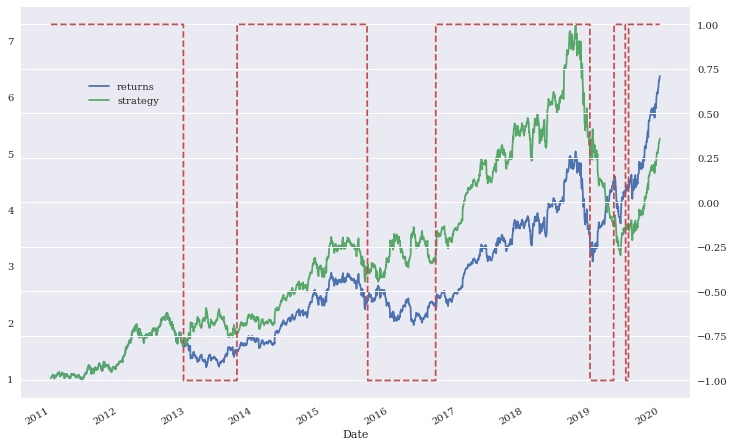

In [25]:
ax = data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize = (12, 8))
data['position'].plot(ax = ax, secondary_y = 'position', style = '--')
ax.get_legend().set_bbox_to_anchor((0.22, 0.83))
plt.savefig('../WORK/plot_02.png', dpi = 500)
plt.show()

Notice that transaction costs (fixed fees, bid-ask spreads, lending costs...) are not included. This might be justifiable for a trading strategy that leads to a few trades only over multiple years, like this example. It is also assumed that all trades take place at the end-of-day closing prices for the Apple stock. A more realistic backtesting approach would take these and other (merket microstructure) elements into account. 

# Optimization

In [26]:
from itertools import product

In [27]:
list(range(20, 61, 4))

[20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]

In [28]:
list(range(180, 281, 10))

[180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280]

In [29]:
sma_1 = range(20, 61, 4)
sma_2 = range(180, 281, 10)

In [30]:
list(product(sma_1, sma_2))

[(20, 180),
 (20, 190),
 (20, 200),
 (20, 210),
 (20, 220),
 (20, 230),
 (20, 240),
 (20, 250),
 (20, 260),
 (20, 270),
 (20, 280),
 (24, 180),
 (24, 190),
 (24, 200),
 (24, 210),
 (24, 220),
 (24, 230),
 (24, 240),
 (24, 250),
 (24, 260),
 (24, 270),
 (24, 280),
 (28, 180),
 (28, 190),
 (28, 200),
 (28, 210),
 (28, 220),
 (28, 230),
 (28, 240),
 (28, 250),
 (28, 260),
 (28, 270),
 (28, 280),
 (32, 180),
 (32, 190),
 (32, 200),
 (32, 210),
 (32, 220),
 (32, 230),
 (32, 240),
 (32, 250),
 (32, 260),
 (32, 270),
 (32, 280),
 (36, 180),
 (36, 190),
 (36, 200),
 (36, 210),
 (36, 220),
 (36, 230),
 (36, 240),
 (36, 250),
 (36, 260),
 (36, 270),
 (36, 280),
 (40, 180),
 (40, 190),
 (40, 200),
 (40, 210),
 (40, 220),
 (40, 230),
 (40, 240),
 (40, 250),
 (40, 260),
 (40, 270),
 (40, 280),
 (44, 180),
 (44, 190),
 (44, 200),
 (44, 210),
 (44, 220),
 (44, 230),
 (44, 240),
 (44, 250),
 (44, 260),
 (44, 270),
 (44, 280),
 (48, 180),
 (48, 190),
 (48, 200),
 (48, 210),
 (48, 220),
 (48, 230),
 (48

In [31]:
results = pd.DataFrame()

for SMA_1, SMA_2 in product(sma_1, sma_2):
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace = True)
    data['returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA_1'] = data[symbol].rolling(SMA_1).mean()
    data['SMA_2'] = data[symbol].rolling(SMA_2).mean()
    data.dropna(inplace = True)
    data['position'] = np.where(data['SMA_1'] > data['SMA_2'], 1.0, -1.0)
    data['strategy'] = data['position'].shift(1) * data['returns']
    data.dropna(inplace = True)
    perf = np.exp(data[['returns', 'strategy']].sum())
    results = results.append(pd.DataFrame({
        'SMA_1': SMA_1, 'SMA_2': SMA_2, 
        'MARKET' : perf['returns'], 
        'STRATEGY' : perf['strategy'], 
        'OUT' : perf['strategy'] - perf['returns']}, 
        index = [0]), ignore_index = True)


In [32]:
results

,SMA_1,SMA_2,MARKET,STRATEGY,OUT
0,20,180,7.257536,3.971133,-3.286403
1,20,190,7.377089,5.223717,-2.153372
2,20,200,6.464000,5.684757,-0.779244
3,20,210,6.757683,5.340947,-1.416736
4,20,220,6.694846,5.385602,-1.309244
...,...,...,...,...,...
116,60,240,6.417784,4.564173,-1.853611
117,60,250,6.319137,4.474075,-1.845061
118,60,260,5.968155,3.976158,-1.991998
119,60,270,5.989196,3.677278,-2.311919


In [33]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA_1     121 non-null    int64  
 1   SMA_2     121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [34]:
results.sort_values('OUT', ascending = False).head(10)

,SMA_1,SMA_2,MARKET,STRATEGY,OUT
56,40,190,7.377089,7.945422,0.568333
46,36,200,6.464000,6.878117,0.414117
101,56,200,6.464000,6.793928,0.329928
55,40,180,7.257536,7.430712,0.173175
39,32,240,6.417784,6.386121,-0.031663
110,60,180,7.257536,7.219310,-0.038226
45,36,190,7.377089,7.208510,-0.168579
59,40,220,6.694846,6.486247,-0.208599
34,32,190,7.377089,7.100412,-0.276677
44,36,180,7.257536,6.979190,-0.278346


As we can observe, according to the brute-force based optimization, SMA_1 = 40 and SMA_2 = 190 are the optimal parameters, leading to an outperformace of about 57 percentage points. Nevertheless, notice that this result is heavily dependent on the data used and is prone to __overfitting__. A more rigorous approach would be to implement the optimization on one dataset, the in-sample or training data set, and test it on another one, the out-of-sample or testing dataset.

In conclusion, our single strategy backtested on a single financial time series, namely historical end-of-day prices for the Apple stock, outperforms the benchmark investment of simply going long on the Apple stock over the same period.

__These results, however are incontrast to what the random walk hypothesis (RWH) predicts, namely, that such predictive approaches should not yield any performance at all. The RWH postulates the prices in financial markets follow a random walk, or, in continuous time, an arithmetic Brownian motion wihout drift__. The expected value of an arithmetic Brownian motion without drift at any point in the future equals its value today. As a consequence, the best predictor for tomorrow's price, in a least-squares sense, is today's price if the RWH applies

_"For many years, economists, statisticians and teachers of finance have been interested in developing and testing models of stock price behavior. One important model that has evolved from this research is the theory of random walks. This theory casts serious doubt on many other methods for describing and predicting stock price behavior - methods that have considerable popularity outside the academic world. For example, we shall see later that, if the random walk theory is an accurate description of reality, then the various "technical" or "chartist" procedures for predicting stock prices are completely without value."_

___Eugene Fama (1965)___

The RWH is consistent with the efficient markets hypothesis (EMH), which, non-technically speaking, states that market prices reflect all "all available information." Different degrees of efficiency are generally distinguished, such as weak, semi-strong, and strong, defining more specifically what "all available information" entails. Formally, such definition can be based on the concept of an information set in theory and on a dataset for programming purposes, as the following quote illustrates:

_"A market is efficient with respect to an information set S if it is impossible to make economic profits by trading on the basis of information set S."_

Using Python, the RWH can be tested for a specific case as follows. A financial time series of historical market prices is used for which a number of lagged versions are created -say, five. OLS regression is then used to predict the market prices based on the lagged market prices created before. The basic idea is that the market prices from yesterday and four more days back can be used to predict today's market price.

The following Python code implements this idea and created five lagged versions of the historical end-of-day closing levels of the S&P 500 stock index:

In [35]:
symbol = '.SPX'

In [36]:
data = pd.DataFrame(raw[symbol])

In [37]:
data.dropna(inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [39]:
data

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
...,...
2019-12-24,3223.38
2019-12-26,3239.91
2019-12-27,3240.02


In [40]:
lags = 5
cols = []

for lag in range(1, lags + 1):
    # defines a column name for the current lag value
    col = 'lag_{}'.format(lag)
    # creates the lagged version of the market prices for the current lag value
    data[col] = data[symbol].shift(lag)
    # collects the column names for later use
    cols.append(col)
    

In [41]:
data.head(10)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69


In [42]:
data.dropna(inplace = True)

In [43]:
data.head(10)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98
2010-01-19,1150.23,1136.03,1148.46,1145.68,1136.22,1146.98
2010-01-20,1138.04,1150.23,1136.03,1148.46,1145.68,1136.22
2010-01-21,1116.48,1138.04,1150.23,1136.03,1148.46,1145.68
2010-01-22,1091.76,1116.48,1138.04,1150.23,1136.03,1148.46


In [44]:
# Returns the least-squares solution to a linear matrix equation
reg = np.linalg.lstsq(data[cols], data[symbol], rcond = None)[0]

In [45]:
reg

array([ 0.96896118,  0.0089709 ,  0.02298002, -0.02452159,  0.02404237])

In [46]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [47]:
symbol

'.SPX'

In [48]:
reg.round(3)

array([ 0.969,  0.009,  0.023, -0.025,  0.024])

Using NumPy, the OLS regression is straightforward to implement. As the optimal regression parameters show, lag_1 is indeed the most important one in predicting the market price based on OLS regression. Its value is close to 1. The other four values are rather close to zero. The following figure visualizes the optimal regression parameter values.

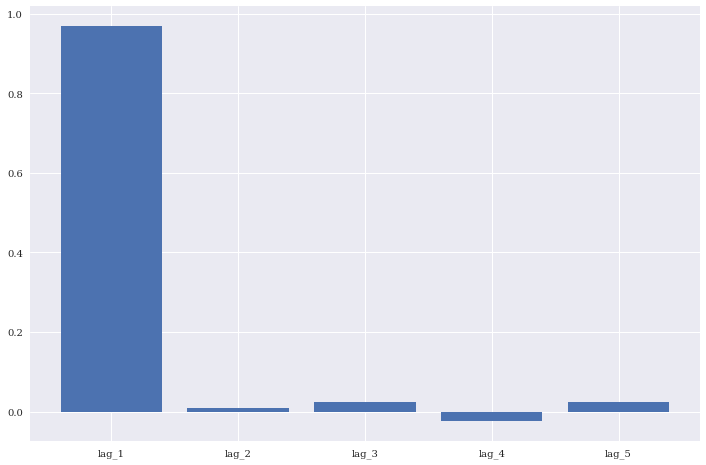

In [49]:
plt.figure(figsize = (12, 8))
plt.bar(cols, reg)
plt.savefig('../WORK/plot_03.png', 
           dpi = 500)

In [50]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [51]:
data['prediction'] = np.dot(data[cols], reg)

In [52]:
data['prediction']

Date
2010-01-11    1145.185136
2010-01-12    1147.326798
2010-01-13    1136.897655
2010-01-14    1146.042177
2010-01-15    1148.603545
                 ...     
2019-12-24    3225.001135
2019-12-26    3224.397831
2019-12-27    3240.426678
2019-12-30    3240.979731
2019-12-31    3223.294461
Name: prediction, Length: 2511, dtype: float64

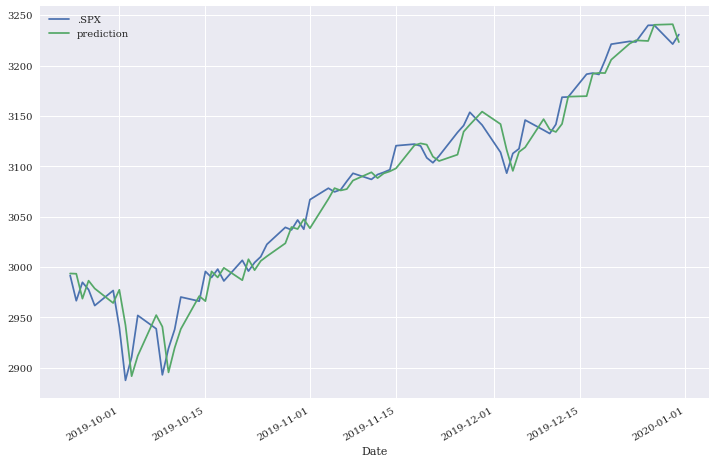

In [53]:
data[[symbol, 'prediction']].iloc[-70: ].plot(figsize = (12, 8))
plt.show()

When using the optimal results to visualize the prediction values as compared to the original index values for the S&P 500, it becomes clear that indeed lag_1 is basically what is used to come up with the prediction value. Graphically speaking, the prediction line in the above figure is the original time series shifted by one day to the right (with some minor adjustments).

All in all, __the brief analysis in this section reveals some support for both the Random Walk Hypothesis (RWH) and the Efficient Market Hypothesis (EMH)__. For sure, the analysis is done for a single stock index only and uses a rather specific parameterization - but this can easily be widened to incorporate multiple financial instruments across multiple asset classes, different values for the number of lags, etc. In general, __one will find out that the results are qualitatively more or less the same__. After all, the RWH and EMH are among the financial theories that have broad empirical support. In that sense, __any algorithmic trading strategy must prove its worth by proving that the RWH does not apply in general. This for sure is a tough hurdle__.

In [54]:
data

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
Date,,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99,1145.185136
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52,1147.326798
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14,1136.897655
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69,1146.042177
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98,1148.603545
...,...,...,...,...,...,...,...
2019-12-24,3223.38,3224.01,3221.22,3205.37,3191.14,3192.52,3225.001135
2019-12-26,3239.91,3223.38,3224.01,3221.22,3205.37,3191.14,3224.397831
2019-12-27,3240.02,3239.91,3223.38,3224.01,3221.22,3205.37,3240.426678


# Linear OLS Regression

We now apply linear OLS regression to predict the direction of market movements based on historical log returns. To keep things simple, only two features are used. The first feature (lag_1) representes the log returns of the financial time series lagged by one day. The second feature (lag_2) lags the log returns by two days. __Log returns__ - in contrast to prices - are __stationary__ in general, which often is a necessary condition for the application of a statistical and Machine Learning Algorithms.

The basic idea behind the usage of lagged log returns as features is that they might be informative in predicting future returns. For example, one might hypothesize that after two downward movements an upward movement is likely ("Mean reversion"), or, to the contrary, that another downward movement is more likely ("Momentum" or "Trend"). The application of regression techniques allows the formalization of such informal reasonings.

## Data

We will study the distribution of log returns for the EUR/USD exchange rate.

In [55]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import warnings

In [56]:
warnings.simplefilter('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

In [57]:
raw = pd.read_csv('../DataSets/fin_dat.csv', index_col = 0, parse_dates = True)

In [58]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.520000,157.590,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63


In [59]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [60]:
symbol = 'EUR='

In [61]:
data = pd.DataFrame(raw[symbol])

In [62]:
data

,EUR=
Date,
2010-01-01,1.4323
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
...,...
2019-12-26,1.1096
2019-12-27,1.1175
2019-12-30,1.1197


In [63]:
data['returns'] = np.log(data / data.shift(1))

In [64]:
data

,EUR=,returns
Date,,
2010-01-01,1.4323,NaN
2010-01-04,1.4411,0.006125
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
...,...,...
2019-12-26,1.1096,0.000541
2019-12-27,1.1175,0.007094
2019-12-30,1.1197,0.001967


In [65]:
data.dropna(inplace = True)

In [66]:
data

,EUR=,returns
Date,,
2010-01-04,1.4411,0.006125
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
2010-01-08,1.4412,0.006544
...,...,...
2019-12-26,1.1096,0.000541
2019-12-27,1.1175,0.007094
2019-12-30,1.1197,0.001967


In [67]:
data['direction'] = np.sign(data['returns']).astype(int)

In [68]:
data

,EUR=,returns,direction
Date,,,
2010-01-04,1.4411,0.006125,1
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
...,...,...,...
2019-12-26,1.1096,0.000541,1
2019-12-27,1.1175,0.007094,1
2019-12-30,1.1197,0.001967,1


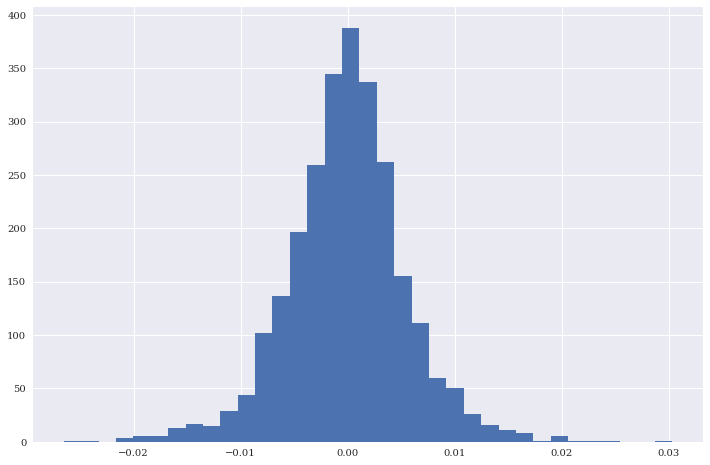

In [69]:
data['returns'].hist(bins = 35, figsize = (12, 8))
plt.show()

In [70]:
lags = 2

In [71]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [72]:
create_lags(data)

In [73]:
data

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-04,1.4411,0.006125,1,NaN,NaN
2010-01-05,1.4368,-0.002988,-1,0.006125,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
...,...,...,...,...,...
2019-12-26,1.1096,0.000541,1,0.000271,0.000090
2019-12-27,1.1175,0.007094,1,0.000541,0.000271
2019-12-30,1.1197,0.001967,1,0.007094,0.000541


In [74]:
data.dropna(inplace = True)

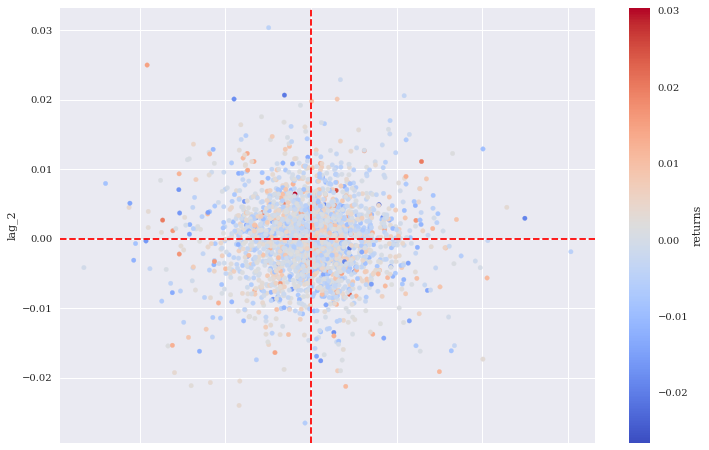

In [75]:
data.plot.scatter(x = 'lag_1', y = 'lag_2', c = 'returns',
                 cmap = 'coolwarm', figsize = (12, 8),
                 colorbar = True)
plt.axvline(0, c = 'r', ls = '--')
plt.axhline(0, c = 'r', ls = '--')
plt.show()

# Regression

With the dataset completed, linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movement based on the features, and to backtest atrading strategy based on the predictions. Two basic approaches are available: using the ___log returns___ or only the ___direction data___ as the response variable during the regression. In any case, predictions are real-valued and therefore transmittd to either +1 or to -1 to only work with the direction or the prediction:

In [76]:
# The Linear OLS Regression implementation from scikit-learn is used
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [78]:
# The regression is implemented on the log returns directly
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])

In [79]:
# The regression is implemented on the direction data, which is of primary interest
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])

In [80]:
data[['pos_ols_1', 'pos_ols_2']]

,pos_ols_1,pos_ols_2
Date,,
2010-01-06,0.000004,-0.004744
2010-01-07,-0.000173,-0.000386
2010-01-08,0.000043,0.027334
2010-01-11,-0.000262,-0.004859
2010-01-12,-0.000169,-0.061068
...,...,...
2019-12-26,-0.000100,0.002220
2019-12-27,-0.000104,-0.000002
2019-12-30,-0.000217,-0.036998


In [81]:
# transforms the real-values predictions into directional values (+1, -1)
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[["pos_ols_1", "pos_ols_2"]] > 0, 1, -1)

In [82]:
# demonstrates that the two approaches yield different directional predictions in general
data['pos_ols_1'].value_counts()

-1    2170
 1     436
Name: pos_ols_1, dtype: int64

In [83]:
# demonstrates that the two approaches yield different directional predictions in general
data['pos_ols_2'].value_counts()

 1    1458
-1    1148
Name: pos_ols_2, dtype: int64

In [84]:
# demonstrates that both approaches lead to a relatively large number of trades over time
(data['pos_ols_1'].diff() != 0).sum()

796

In [85]:
# demonstrates that both approaches lead to a relatively large number of trades over time
(data['pos_ols_2'].diff() != 0).sum()

901

Vectorized backtesting can now be applied to judge the performance of the resulting trading strategies. At this stage, the analysis based on a number of simplifying assumptions, such as "zero transaction costs" and the usage of the same data set for both training and testing. 

In [86]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [87]:
"""
Sums up the log returns of the two strategies and the benchmark investment and
calculates the exponential value to return the absolute performance.
"""
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.780206
strat_ols_1    1.029605
strat_ols_2    1.203034
dtype: float64

In [88]:
# Shows the number of correct and false predictions by the strategy
(data['direction'] == data['pos_ols_1']).value_counts()

False    1319
True     1287
dtype: int64

In [89]:
# Shows the number of correct and false predictions by the strategy
(data['direction'] == data['pos_ols_2']).value_counts()

True     1339
False    1267
dtype: int64

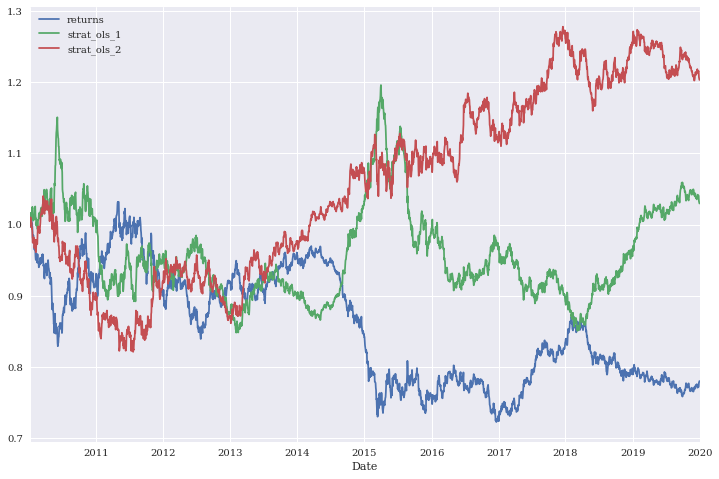

In [90]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

Notice that both regression-based strategies outperform the benchmark passive investment, while only the strategy trained on the direction of the market shows a positive overall performance. In the long term start_ols_2 is the best performing strategy.